In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-transaction-fraud-detection/Bank_Transaction_Fraud_Detection.csv


In [2]:
data = pd.read_csv('/kaggle/input/bank-transaction-fraud-detection/Bank_Transaction_Fraud_Detection.csv')
df = pd.DataFrame(data)
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [3]:
def summarise_data(df):
    # analyse overall data
    print('Data Types: ', end='\n \n')
    print(df.dtypes)
    print('--' * 78, end='\n \n')
    
    print('Null values: ', end='\n \n')
    print(df.isnull().sum())
    print('--' * 78, end='\n \n')

    print('\nDuplicates: ', end='\n \n')
    print(df.duplicated().sum())
    print('--' * 78, end='\n \n')

    # analyse numerical data
    print('Summary statistics: ', end='\n \n')
    print(df.describe())
    print('--' * 78, end='\n \n')

    print('Outliers: ', end='\n \n')
    numeric_cols = df.select_dtypes(include='number').columns
    outlier_counts = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        outlier_counts[col] = outliers.shape[0]
    print(outlier_counts)
    print('--' * 78, end='\n \n')

    print('Correlation Matrix:', end='\n \n')
    print(df[numeric_cols].corr())
    print('--' * 78, end='\n \n')

    # analyse categorical data
    categorical_cols = ['Gender', 'State', 'Account_Type', 'Transaction_Type', 
                       'Merchant_Category', 'Transaction_Device', 'Transaction_Description', 'Transaction_Currency']

    print('Value Counts: ', end='\n \n')
    for col in categorical_cols:
        if col in df.columns:
            print(df[col].value_counts())
            print()

    print('--' * 78, end='\n \n')
    
summarise_data(df)

Data Types: 
 
Customer_ID                 object
Customer_Name               object
Gender                      object
Age                          int64
State                       object
City                        object
Bank_Branch                 object
Account_Type                object
Transaction_ID              object
Transaction_Date            object
Transaction_Time            object
Transaction_Amount         float64
Merchant_ID                 object
Transaction_Type            object
Merchant_Category           object
Account_Balance            float64
Transaction_Device          object
Transaction_Location        object
Device_Type                 object
Is_Fraud                     int64
Transaction_Currency        object
Customer_Contact            object
Transaction_Description     object
Customer_Email              object
dtype: object
-----------------------------------------------------------------------------------------------------------------------------------

In [4]:
df['Is_Fraud'].value_counts()

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

In [5]:
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

# Data Cleaning

In [6]:
unique_des = sorted(df['Transaction_Description'].unique())

num_cols = 6
col_width = 25  

# Pad list to fill rows completely
import math
num_rows = math.ceil(len(unique_des) / num_cols)
padded = unique_des + [''] * (num_rows * num_cols - len(unique_des))

# Prepare horizontal border line
border = '+' + '+'.join(['-' * col_width] * num_cols) 

print(border)
for row_idx in range(num_rows):
    row_items = padded[row_idx * num_cols:(row_idx + 1) * num_cols]
    # Format each cell to fixed width, left aligned
    row_str = '|'.join(item.ljust(col_width) for item in row_items)
    print('|' + row_str + '|')
    print(border)

+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------
|ATM withdrawal           |Airline ticket           |Apparel purchase         |Bank fee                 |Bank transfer            |Beauty products          |
+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------
|Bike rental              |Bill payment             |Birthday present         |Bitcoin transaction      |Bookstore purchase       |Bus fare                 |
+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------+-------------------------
|Business expense         |Cafe purchase            |Camping gear purchase    |Camping trip             |Car rental               |Car repair service       |
+-------------------------+-------------------------+--

In [7]:
# data cleaning
def clean_data(df):
    # 1. Drop unnecessary columns
    drop_cols = ['Customer_ID', 'Customer_Name', 'Transaction_ID', 'Merchant_ID',
                 'Transaction_Currency', 'Customer_Contact', 'Customer_Email']
    df = df.drop(columns=drop_cols)
    print('Step 1 complete')

            
    # 3. Fix datatypes
    df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce', dayfirst=True)
    df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S', errors='coerce').dt.time
    print('Step 3 complete')

    # 4. Optimize Is_Fraud data type
    df['Is_Fraud'] = df['Is_Fraud'].astype('int8')
    print('Step 4 complete')

    # 5. Map Transaction_Description to broader categories
    category_mapping = {
        'Travel': [
            'Airline ticket', 'Bike rental', 'Bus fare', 'Car rental', 'Car repair service', 'Taxi booking', 
            'Flight booking', 'Moving services payment', 'Public transport pass', 'Ridesharing service', 'Taxi fare',
            'Tourist attraction payment', 'Transportation fare', 'Travel agency payment', 'Travel expenses', 'Travel insurance'
        ],
        'Finance': [
            'ATM withdrawl', 'Bank fee', 'Bank transfer', 'Bill payment', 'Bitcoin transaction', 'Cash deposit', 'Insurance claim',
            'Credit card payment', 'Cryptocurrency purchase', 'Debt repayment', 'Fine payment', 'Fund transfer', 'Installment payment',
            'Insurance premium', 'Investment in gold', 'Loan payment', 'Loan repayment', 'Mutual fund investment', 
            'Personal finance consulting', 'Personal loan repayment', 'Real estate payment', 'Stock investment', 'Transfer', 
            'Vehicle insurance', 'Withdrawal'
        ],
        'Utilities': [
            'Consulting fee', 'Customer service charge', 'Mobile recharge', 'Monthly installment', 'Penalty fee',
            'Property tax payment', 'Tax payment', 'Utility bill payment', 'Utility service'
        ],
        'Health': [
            'Clinic payment', 'Doctor consultation', 'Health insurance payment', 'Healthcare premium', 'Hospital bill',
            'Medical treatment payment', 'Pharmacy bill', 'Pharmacy purchase'
        ],
        'Education': [
            'Bookstore purchase', 'Conference fee', 'Online book purchase', 'Online course payment', 'Online education',
            'Online workshop', 'School fee payment', 'Seminar registration', 'Training course fee', 'Tuition fee payment'
        ],
        'Business': [
            'Business expense', 'Contract renewal', 'Corporate event ticket', 'Document notarization', 'Freelancer payment',
            'Freight charges', 'Hiring fee', 'Import duty payment', 'Legal services payment'
        ]
    }

    desc_to_category = {desc: category for category, descs in category_mapping.items() for desc in descs}
    df['Description_Category'] = df['Transaction_Description'].map(desc_to_category).fillna('Personal')
    print('Step 5 complete')

    # 2. Optimize other object columns
    # for col in df.select_dtypes(include='object').columns:
    #     num_unique = df[col].nunique()
    #     num_total = df[col].count()
    #     if num_unique / num_total < 0.5:
    #         df[col] = df[col].astype('category')
            
    # 6. strip whitespace
    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = df[col].astype(str).str.strip()
    print('Step 6 complete')
    

    # 7. Bank_Branch is same a City name. so we can drop it
    if (df['Bank_Branch'] == df['City'] + ' Branch').all():
        df.drop(columns=['Bank_Branch'], inplace=True)
    print('Step 7 complete')
    
    return df

df = clean_data(df)
df.head()

Step 1 complete
Step 3 complete
Step 4 complete
Step 5 complete
Step 6 complete
Step 7 complete


,Gender,Age,State,City,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Description_Category
0,Male,60,Kerala,Thiruvananthapuram,Savings,2025-01-23,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction,Finance
1,Female,51,Maharashtra,Nashik,Business,2025-01-11,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery,Personal
2,Male,20,Bihar,Bhagalpur,Savings,2025-01-25,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment,Finance
3,Female,57,Tamil Nadu,Chennai,Business,2025-01-19,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery,Personal
4,Female,43,Punjab,Amritsar,Savings,2025-01-30,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment,Finance


In [8]:
summarise_data(df)

Data Types: 
 
Gender                             object
Age                                 int64
State                              object
City                               object
Account_Type                       object
Transaction_Date           datetime64[ns]
Transaction_Time                   object
Transaction_Amount                float64
Transaction_Type                   object
Merchant_Category                  object
Account_Balance                   float64
Transaction_Device                 object
Transaction_Location               object
Device_Type                        object
Is_Fraud                             int8
Transaction_Description            object
Description_Category               object
dtype: object
------------------------------------------------------------------------------------------------------------------------------------------------------------
 
Null values: 
 
Gender                     0
Age                        0
State                   

In [9]:
df['Description_Category'].value_counts()

Description_Category
Personal     111536
Finance       27985
Travel        18639
Education     11824
Business      10425
Utilities     10254
Health         9337
Name: count, dtype: int64

In [10]:
df.to_csv('cleaned.csv' ,index=False)

# Data Visualization

In [11]:
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('cleaned.csv')
df.head()

,Gender,Age,State,City,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Description_Category
0,Male,60,Kerala,Thiruvananthapuram,Savings,2025-01-23,16:04:07,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction,Finance
1,Female,51,Maharashtra,Nashik,Business,2025-01-11,17:14:53,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery,Personal
2,Male,20,Bihar,Bhagalpur,Savings,2025-01-25,03:09:52,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment,Finance
3,Female,57,Tamil Nadu,Chennai,Business,2025-01-19,12:27:02,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery,Personal
4,Female,43,Punjab,Amritsar,Savings,2025-01-30,18:30:46,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment,Finance


## Peak Hours of Fradulent Transactions

1. Fraud occurs throughout the day:
    - Fraudulent transactions are distributed fairly evenly across all 24 hours.
    - This suggests fraud isn't confined to “odd” hours — it happens consistently.
2. Slight peaks during late night and early morning:
    - Around midnight (00:00) and early morning (03:00–04:00), there's a noticeable uptick.
    - This could indicate fraud attempts during times when people are less active or less alert.
3. Sudden dips at certain hours (e.g., 12, 19):
    - These might represent natural slow periods in user activity, like lunch or dinner time.
    - Alternatively, it could reflect system or network downtime during those hours.
4. High volatility between adjacent hours:
    - The pattern isn’t smooth—there are sharp increases and drops, indicating fraud can spike unpredictably.
    - May reflect attacker behavior or detection/monitoring system patterns.

**Final Conclusion**:
- Round-the-clock fraud monitoring is essential — limiting detection to business hours would miss a significant portion of fraud.
- Real-time systems should be reinforced particularly around late night and early morning hours.


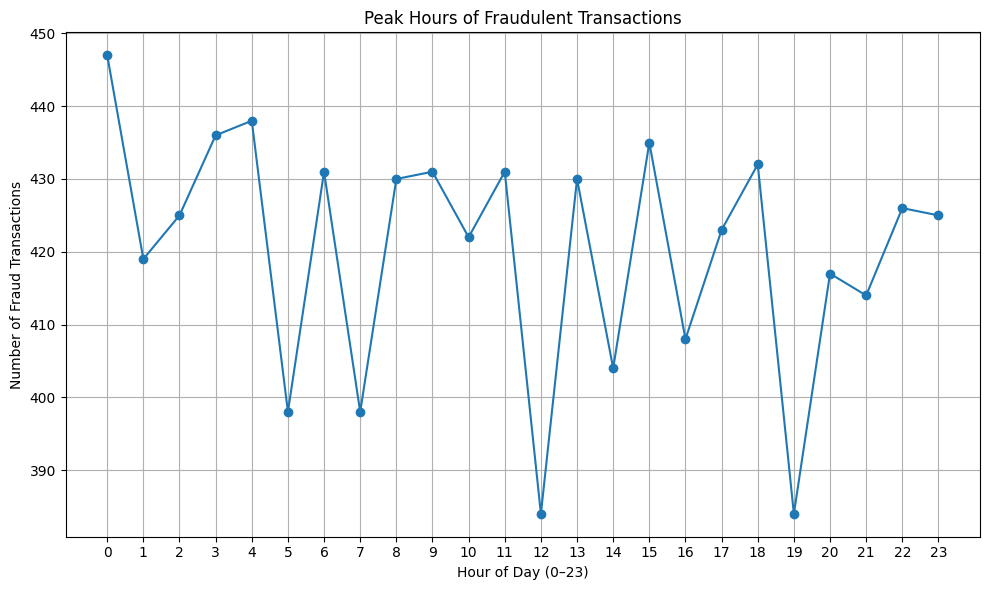

In [13]:
df['Transaction_Hour'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S', errors='coerce').dt.hour
df['Transaction_Hour'] = df['Transaction_Hour'].astype(int)

fraud_df = df[df['Is_Fraud'] == 1]

# Count fraudulent transactions per hour
fraud_by_hour = fraud_df['Transaction_Hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fraud_by_hour.index, fraud_by_hour.values, marker='o')
plt.title('Peak Hours of Fraudulent Transactions')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Fraud Transactions')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [14]:
df['Transaction_Hour'].value_counts()

Transaction_Hour
7     8505
14    8452
15    8424
10    8400
0     8399
22    8394
5     8374
11    8374
16    8373
13    8373
8     8359
3     8329
6     8321
4     8319
2     8312
17    8302
18    8295
21    8293
20    8287
1     8266
23    8256
19    8224
12    8213
9     8156
Name: count, dtype: int64

## Fraud Transactions by Date

**Days with Highest Fraudulent Transactions:** <br>
- Jan1, 2025: New Year. 
- Jan 6, 2025: Guru Gobind Singh Jayanti (Sikh festival). It was a religious holiday which likely lead to increase in spending and relaxed monitoring exploited by fraudsters.
- Jan 14, 2025: Makar sankranti/Pongal. It is a major harvest festival which due to which there was a rise in digital payments for gifts, travel, etc. (Local Maxima)
- Jan 26, 2025: Republic Day (National Holiday). High digital activity, low staff monitoring could be a reason for peak in fraudulent transactions.
- Jan 29, 2025: Start of Kumbh Mela, crowded day. On this day, vast amount of people gathered in Prayagraj which might have led to low digital oversight and likely increase in fraudulent activities.


**Days with Lowest Fraudulent Transactions**: <br>
- Jan 18, 2025: No major event. Likely a typical mid-month weekday with generally lower transaction volume. (Saturday)
- Jan 4, 2025: Skanda Sashti (Hindu observance). Religious observances may lead to more cash use or fewer transactions overall. (saturday)
- Jan 25, 2025:	Day before Republic Day. Possible reduced banking hours or cautious behavior pre-holiday. (Saturday)
- Jan 15, 2025:	Post Pongal. Lower activity after festival spending; recovery day. (Saturday)

One interesting thing is that Saturdays consistently saw the lowest fraud activity, likely due to reduced digital engagement and offline routines. This highlights how user behavior patterns—driven by cultural events and institutional schedules — can inform fraud prevention strategies. <br> 


**Overall Insights**: <br>
- High fraud days cluster around major national/religious events, likely due to increased transaction volume and reduced human monitoring.
- Low fraud days often follow festivals or occur on minor religious observances, possibly reflecting reduced digital engagement.
- Timing of fraud appears to be strategically aligned with user behavior patterns, highlighting the importance of adaptive, event-aware fraud detection systems.

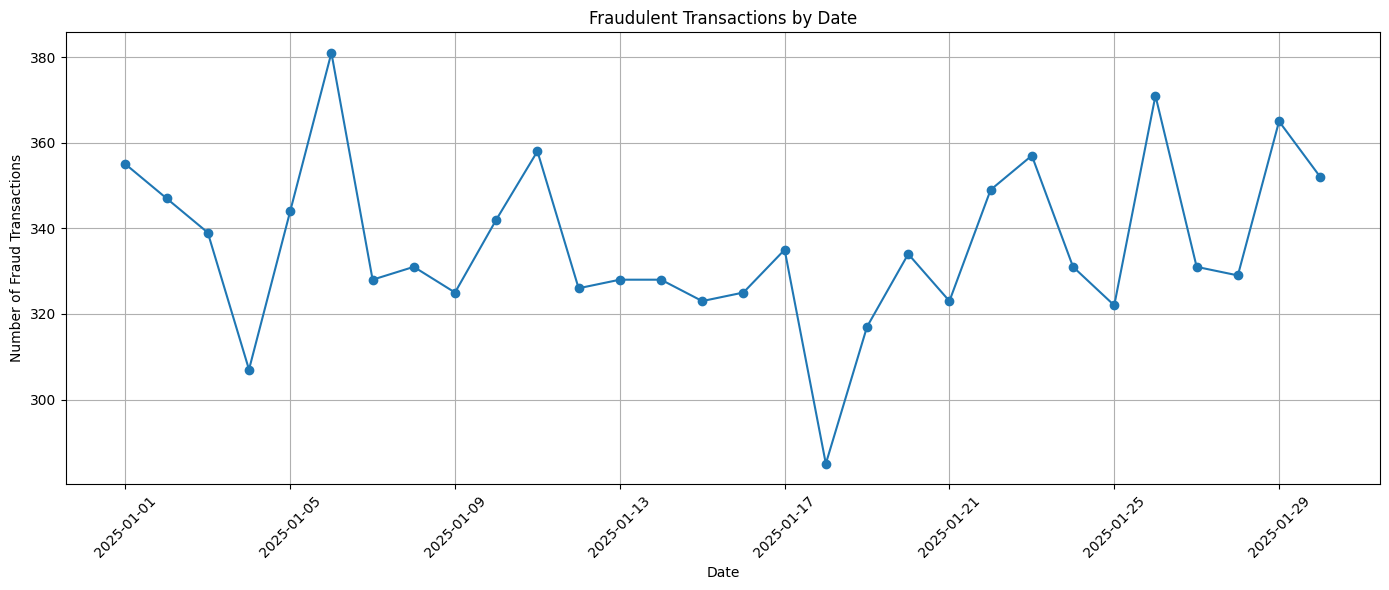

In [15]:
# Ensure Transaction_Date is in datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

# Filter fraud transactions
fraud_df = df[df['Is_Fraud'] == 1]

# Count frauds by date
fraud_by_date = fraud_df['Transaction_Date'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(fraud_by_date.index, fraud_by_date.values, marker='o')
plt.title('Fraudulent Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
min(df['Transaction_Date'])

Timestamp('2025-01-01 00:00:00')

In [17]:
max(df['Transaction_Date'])

Timestamp('2025-01-31 00:00:00')

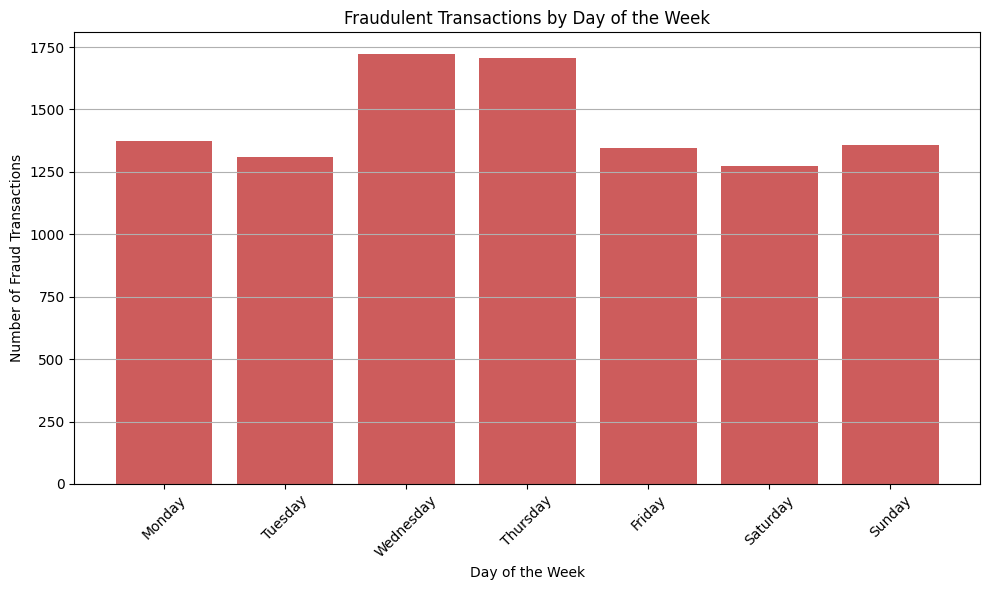

In [18]:
df['Transaction_Weekday'] = df['Transaction_Date'].dt.day_name()

# Filter only fraud transactions
fraud_df = df[df['Is_Fraud'] == 1]

# Count frauds by weekday
fraud_by_day = fraud_df['Transaction_Weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(fraud_by_day.index, fraud_by_day.values, color='indianred')
plt.title('Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Fraud Transactions by Transaction Type & Merchant Category

The distribution of fraudulent transactions across both transaction types and merchant categories appears to be fairly uniform, suggesting that fraud is opportunistic rather than concentrated. This implies that broad-spectrum monitoring is essential, as no single transaction type or merchant category can be considered 'safe' from fraud.

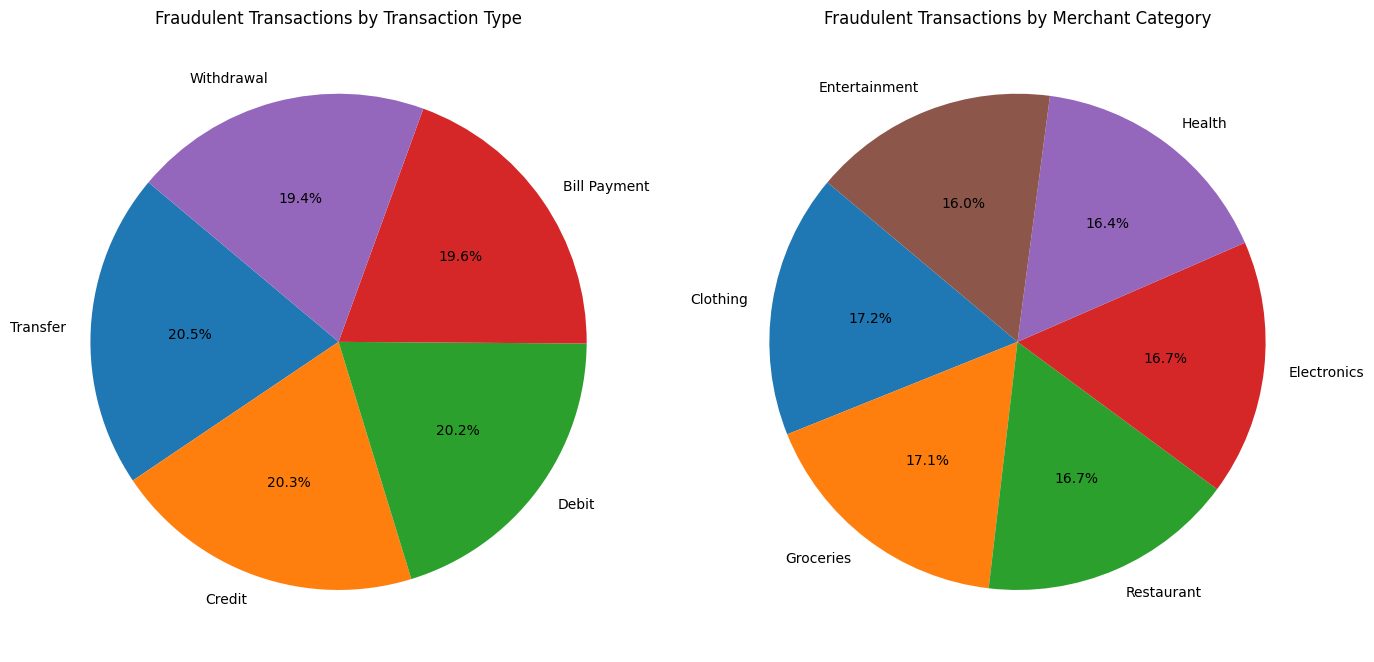

In [19]:
fraud_by_type = df[df['Is_Fraud'] == 1]['Transaction_Type'].value_counts()
fraud_by_merchant = df[df['Is_Fraud'] == 1]['Merchant_Category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(fraud_by_type, labels=fraud_by_type.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Fraudulent Transactions by Transaction Type')

axes[1].pie(fraud_by_merchant, labels=fraud_by_merchant.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Fraudulent Transactions by Merchant Category')

plt.tight_layout()
plt.show()


## Description Category vs Fraud

While the Personal category shows the highest number of fraud transactions, this is likely due to its naturally high transaction volume, especially among middle-class consumers. To make a fair comparison, it’s essential to analyze the fraud rate—the proportion of fraudulent transactions out of total transactions in each category. This reveals the relative risk and helps identify categories that are disproportionately affected by fraud, even if their overall volume is lower.

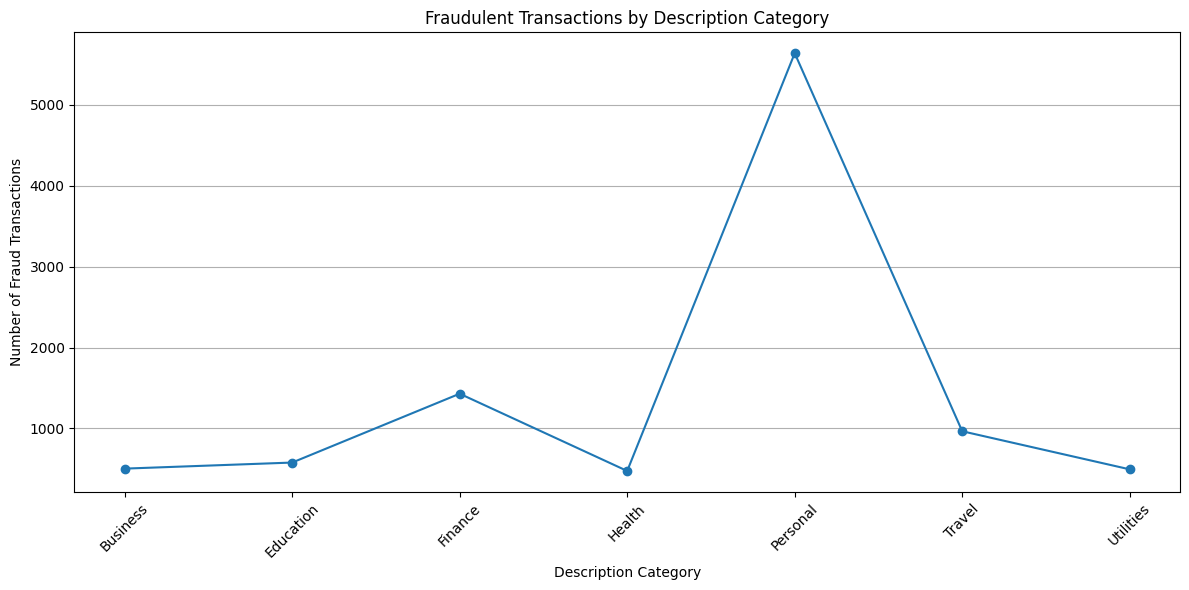

In [20]:
fraud_by_description = df[df['Is_Fraud'] == 1]['Description_Category'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(fraud_by_description.index, fraud_by_description.values, marker='o')
# fraud_by_description.plot(kind='line', color='darkblue')
plt.title('Fraudulent Transactions by Description Category')
plt.xlabel('Description Category')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# plt.plot(fraud_by_date.index, fraud_by_date.values, marker='o')


## Fraud Rate by Category

Although the total amount of transactions under Personal category is largest (and correspondingly, the absolute amount of fraud cases is too), the fraud rate (or the relative amount of risk) is, in fact, a bit more under such categories as Travel, Finance, and even Health. That is the case with the Finance which entails big-time transactions like gold prey, insurance deposits, ATM or bank transfers, etc., and as such, it is a big target of scamsters.

In Education category, the occurrence of a fraud could be due to openings in online facilities such as courses enrollment, online workshops, and electronic learning payments the backgrounds which can be accessed by phishing or fraudulent sites.

Thus, we feel the need to dive deeper into the categories and analyse the percentage of fraud transactions in each subcategory. 

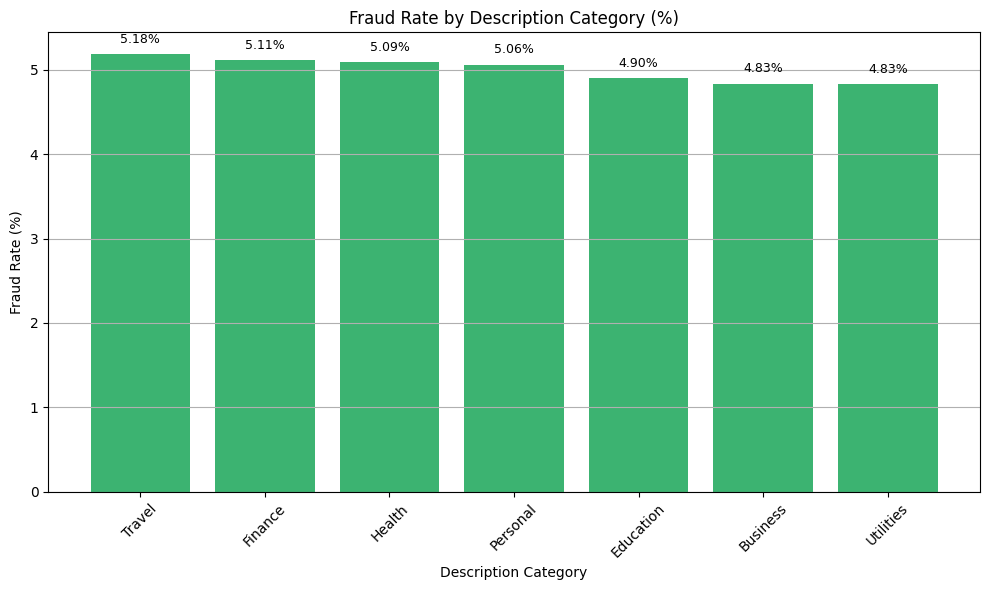

In [21]:
total_by_category = df['Description_Category'].value_counts()

fraud_by_category = df[df['Is_Fraud'] == 1]['Description_Category'].value_counts()

fraud_rate = (fraud_by_category / total_by_category) * 100
fraud_rate = fraud_rate.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_rate.index, fraud_rate.values, color='mediumseagreen')
plt.title('Fraud Rate by Description Category (%)')
plt.xlabel('Description Category')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [22]:
import plotly.express as px

fraud_df = df[df['Is_Fraud'] == 1]

sunburst_data = fraud_df.groupby(['Description_Category', 'Transaction_Description']).size().reset_index(name='Count')

fig = px.sunburst(
    sunburst_data,
    path=['Description_Category', 'Transaction_Description'],
    values='Count',
    title='Fraudulent Transactions by Category and Subcategory',
    color='Description_Category'
)

fig.show()


In [23]:
categories = df['Description_Category'].unique()

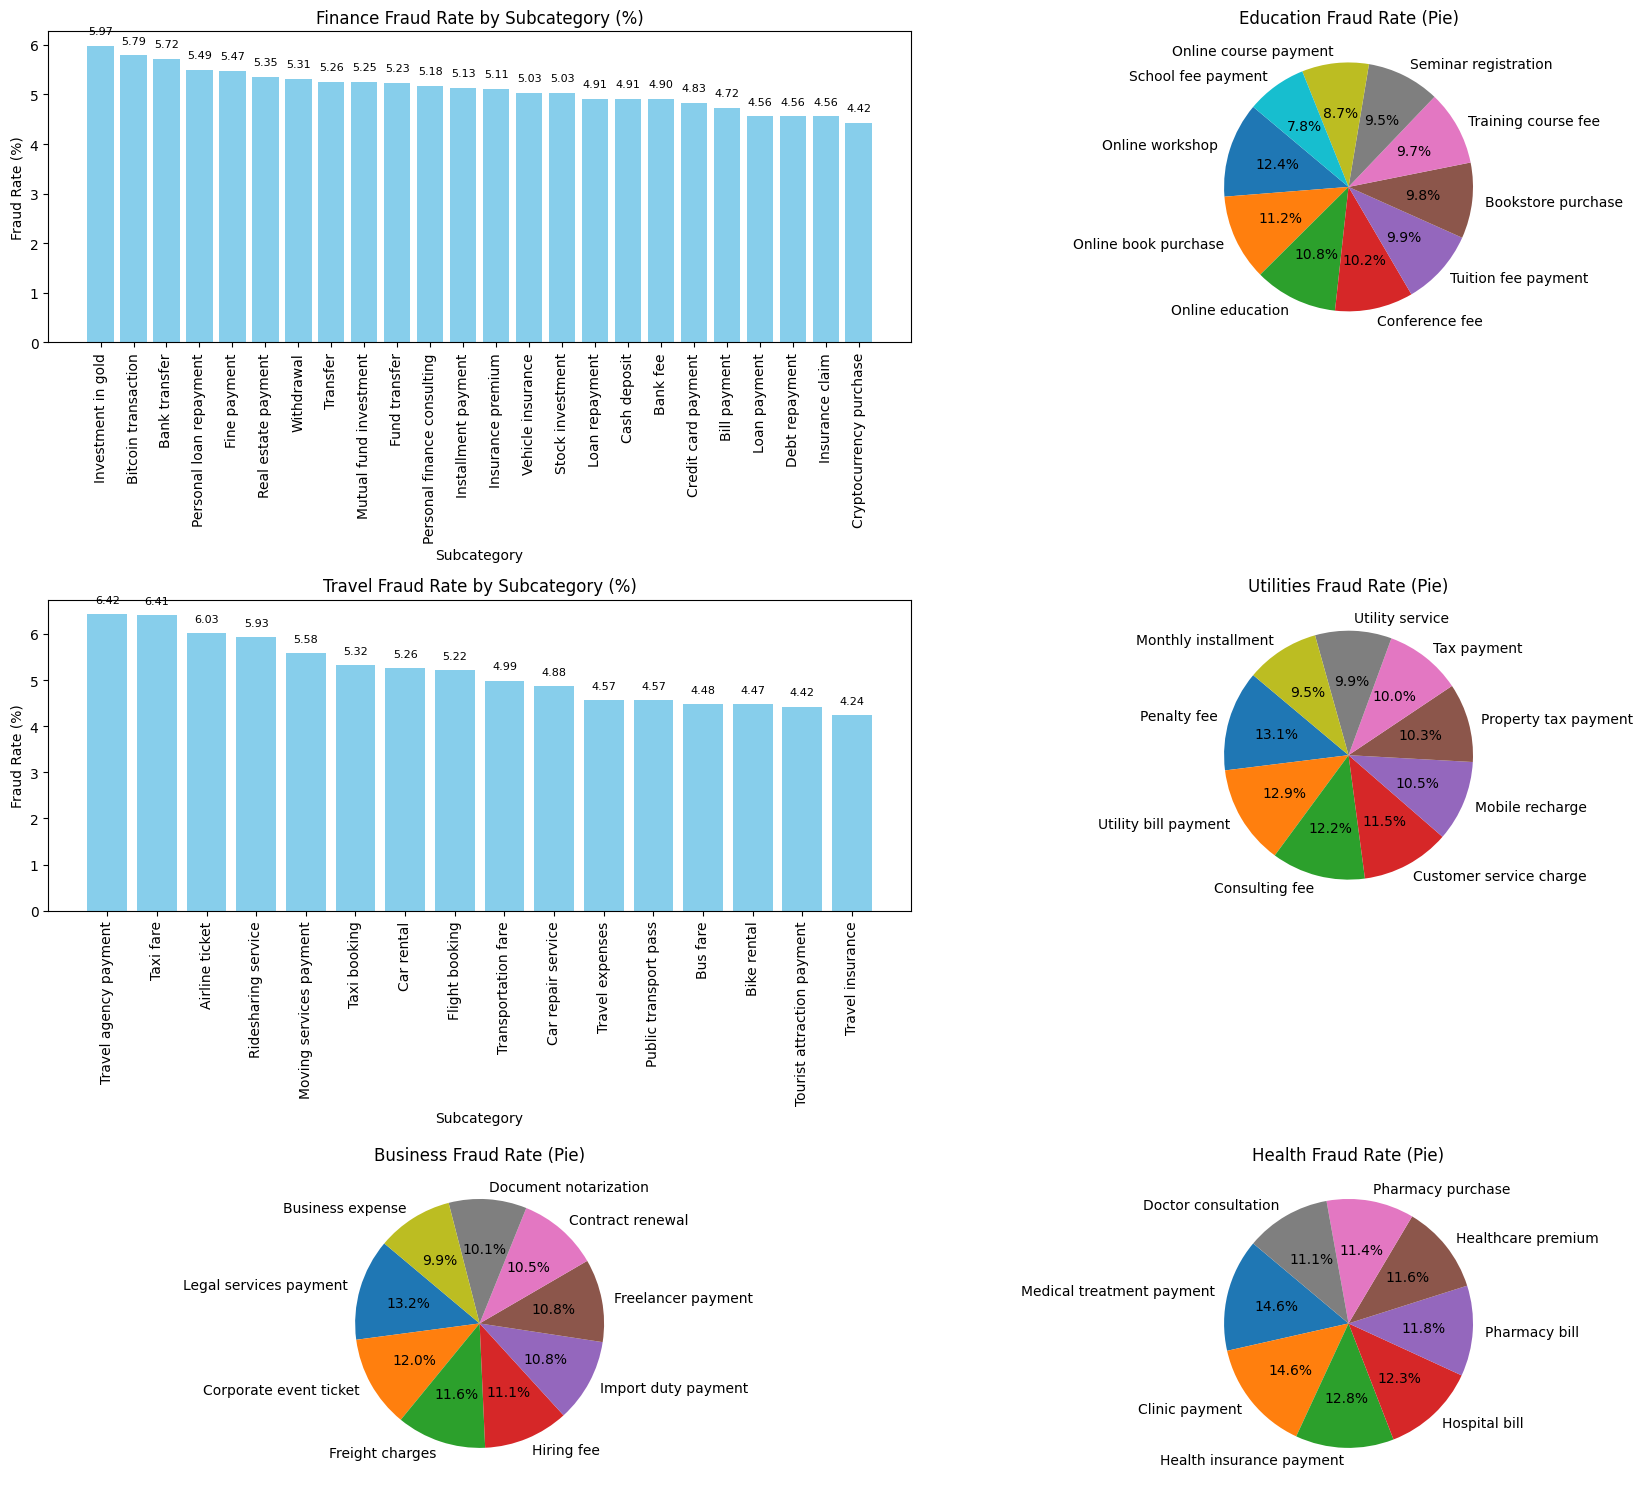

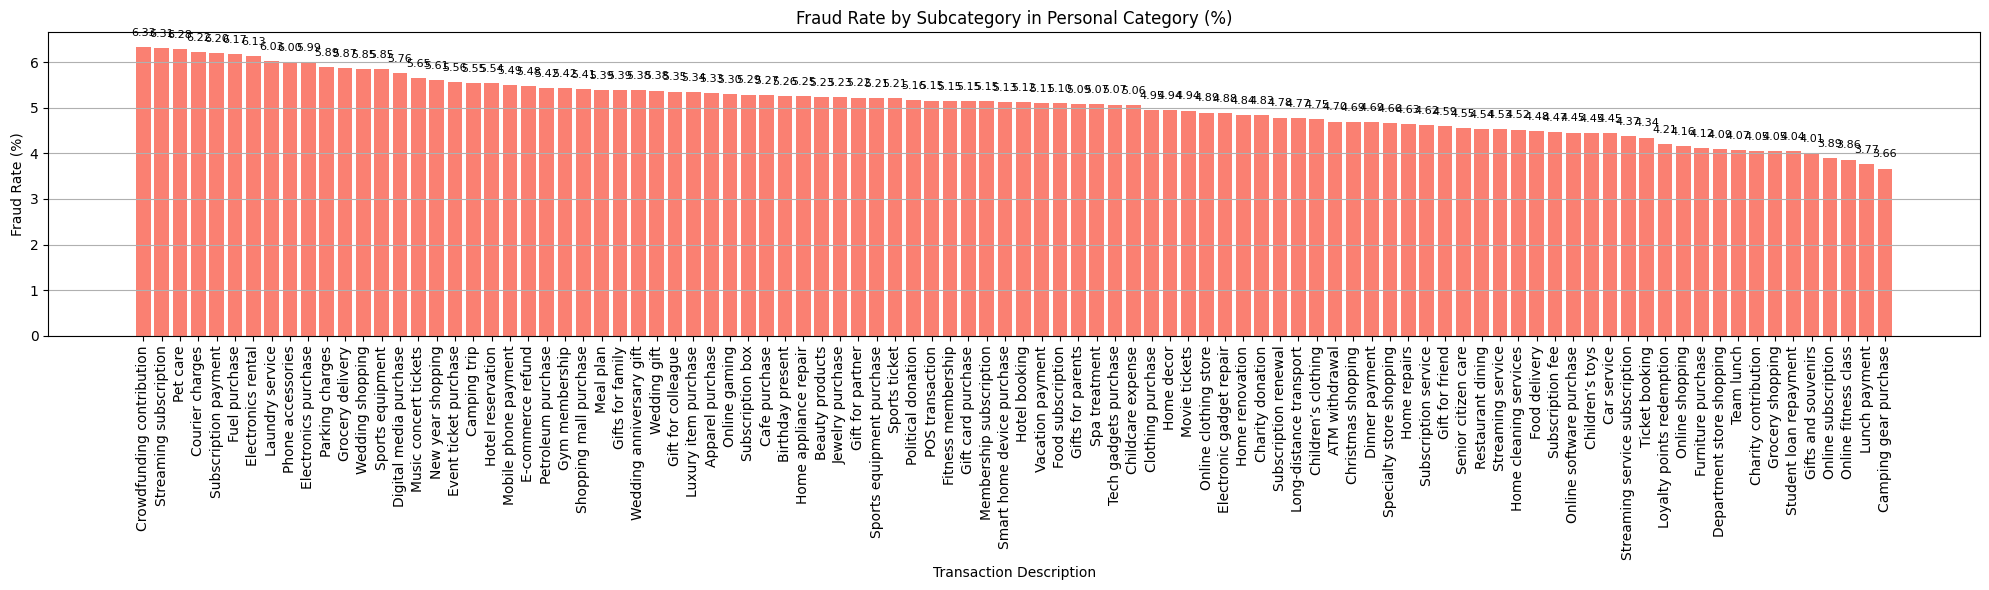

In [24]:
filtered_categories = [cat for cat in categories if cat != 'Personal']
filtered_n = len(filtered_categories)
cols = 2
filtered_rows = (filtered_n + cols - 1) // cols

fig, axes = plt.subplots(filtered_rows, cols, figsize=(18, filtered_rows * 5))
axes = axes.flatten()

for i, category in enumerate(filtered_categories):
    ax = axes[i]
    
    total_subcat = df[df['Description_Category'] == category]['Transaction_Description'].value_counts()
    fraud_subcat = df[(df['Is_Fraud'] == 1) & (df['Description_Category'] == category)]['Transaction_Description'].value_counts()

    # Calculate fraud percentage
    fraud_percentage = (fraud_subcat / total_subcat * 100).dropna().sort_values(ascending=False)

    if len(fraud_percentage) <= 10:
        ax.pie(fraud_percentage, labels=fraud_percentage.index, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'{category} Fraud Rate (Pie)')
    else:
        bars = ax.bar(fraud_percentage.index, fraud_percentage.values, color='skyblue')
        ax.set_title(f'{category} Fraud Rate by Subcategory (%)')
        ax.set_xlabel('Subcategory')
        ax.set_ylabel('Fraud Rate (%)')
        ax.tick_params(axis='x', rotation=90)
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{height:.2f}',
                    ha='center', va='bottom', fontsize=8)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('frauds1.jpeg', dpi=300, bbox_inches='tight')
plt.show()

# Plot personal category separately
personal_total = df[df['Description_Category'] == 'Personal']['Transaction_Description'].value_counts()
personal_fraud = df[(df['Is_Fraud'] == 1) & (df['Description_Category'] == 'Personal')]['Transaction_Description'].value_counts()
personal_rate = (personal_fraud / personal_total * 100).dropna().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
bars = plt.bar(personal_rate.index, personal_rate.values, color='salmon')
plt.title('Fraud Rate by Subcategory in Personal Category (%)')
plt.xlabel('Transaction Description')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{height:.2f}',
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('frauds2.jpeg', dpi=300, bbox_inches='tight')
plt.show()


While certain subcategories like Investment in Gold, Travel Agency Payment, Online Workshop, and Crowdfunding Contribution appear to have the highest fraud rates within their respective categories, the difference between the most and least fraud-prone subcategories rarely exceeds 2–3%. This suggests that fraud risk is relatively evenly distributed across subcategories within each category.

However, visual patterns reveal thematic trends:
- In the Finance category, fraud is more common in subcategories involving fund movement or financial products (e.g., transfers, investments, cryptocurrency).
- In Personal and Education, subcategories tied to subscriptions, online transactions, and digital services (e.g., streaming, workshops) show slightly elevated fraud rates.
- In Travel, bookings and ticketing services appear more vulnerable than general transport.
- Health, Utilities, and Business categories show a fairly uniform distribution, with no single subcategory significantly standing out in terms of fraud rate.

Thus, while no single subcategory dominates fraud, there are behavioral clusters—such as digital services, fund transfers, and online bookings—that tend to attract more fraud and merit closer monitoring.



## Account Type vs Fraud

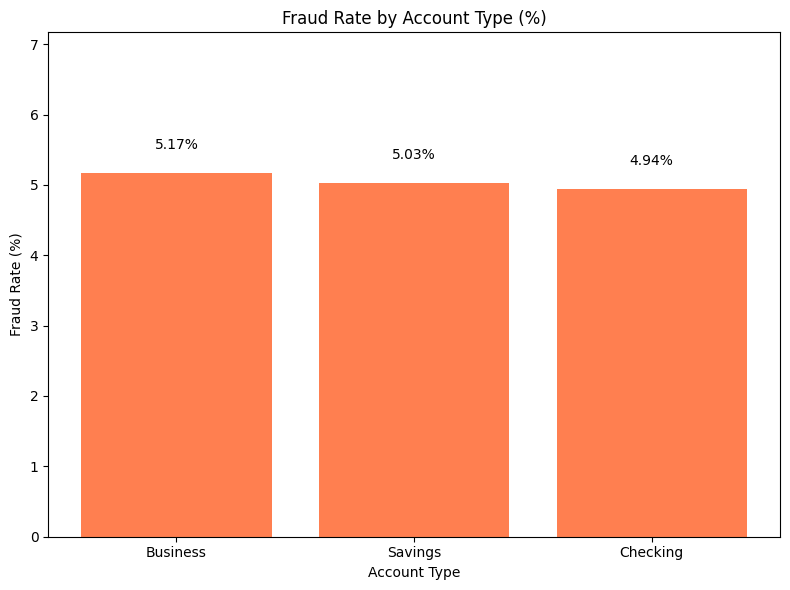

In [25]:
fraud_by_account = df[df['Is_Fraud'] == 1]['Account_Type'].value_counts()
total_by_account = df['Account_Type'].value_counts()
fraud_rate_by_account = (fraud_by_account / total_by_account * 100).sort_values(ascending=False)

# Plot fraud rate by account type
plt.figure(figsize=(8, 6))
bars = plt.bar(fraud_rate_by_account.index, fraud_rate_by_account.values, color='coral')
plt.title('Fraud Rate by Account Type (%)')
plt.xlabel('Account Type')
plt.ylabel('Fraud Rate (%)')
plt.ylim(0, max(fraud_rate_by_account.values) + 2)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.3, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## Age vs Frauds

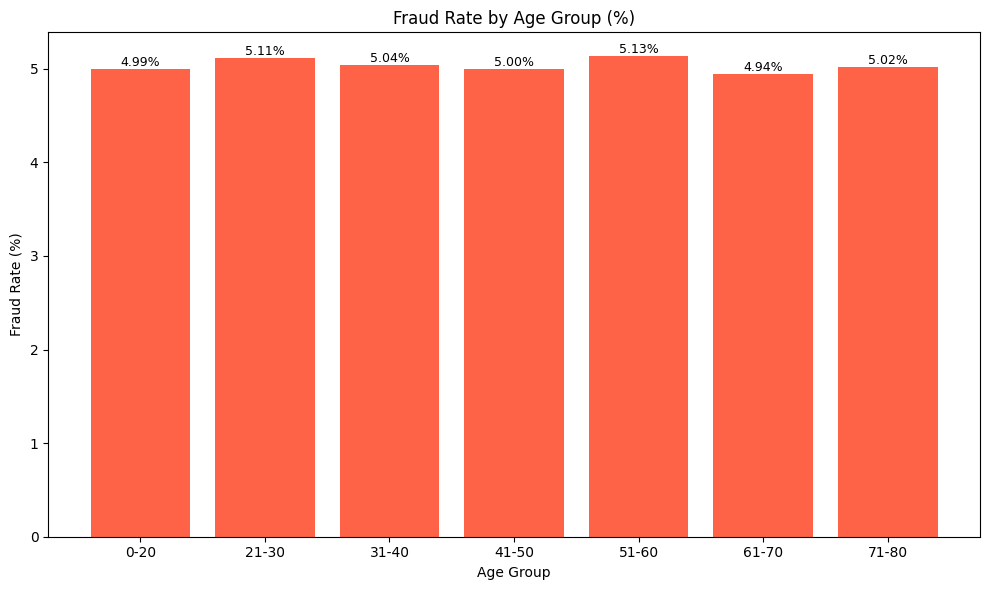

In [26]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Compute fraud rate per age group
fraud_by_age = df[df['Is_Fraud'] == 1]['Age_Group'].value_counts()
total_by_age = df['Age_Group'].value_counts()
fraud_rate_by_age = (fraud_by_age / total_by_age * 100).sort_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_rate_by_age.index, fraud_rate_by_age.values, color='tomato')
plt.title('Fraud Rate by Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate (%)')

# Add labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## State vs Frauds

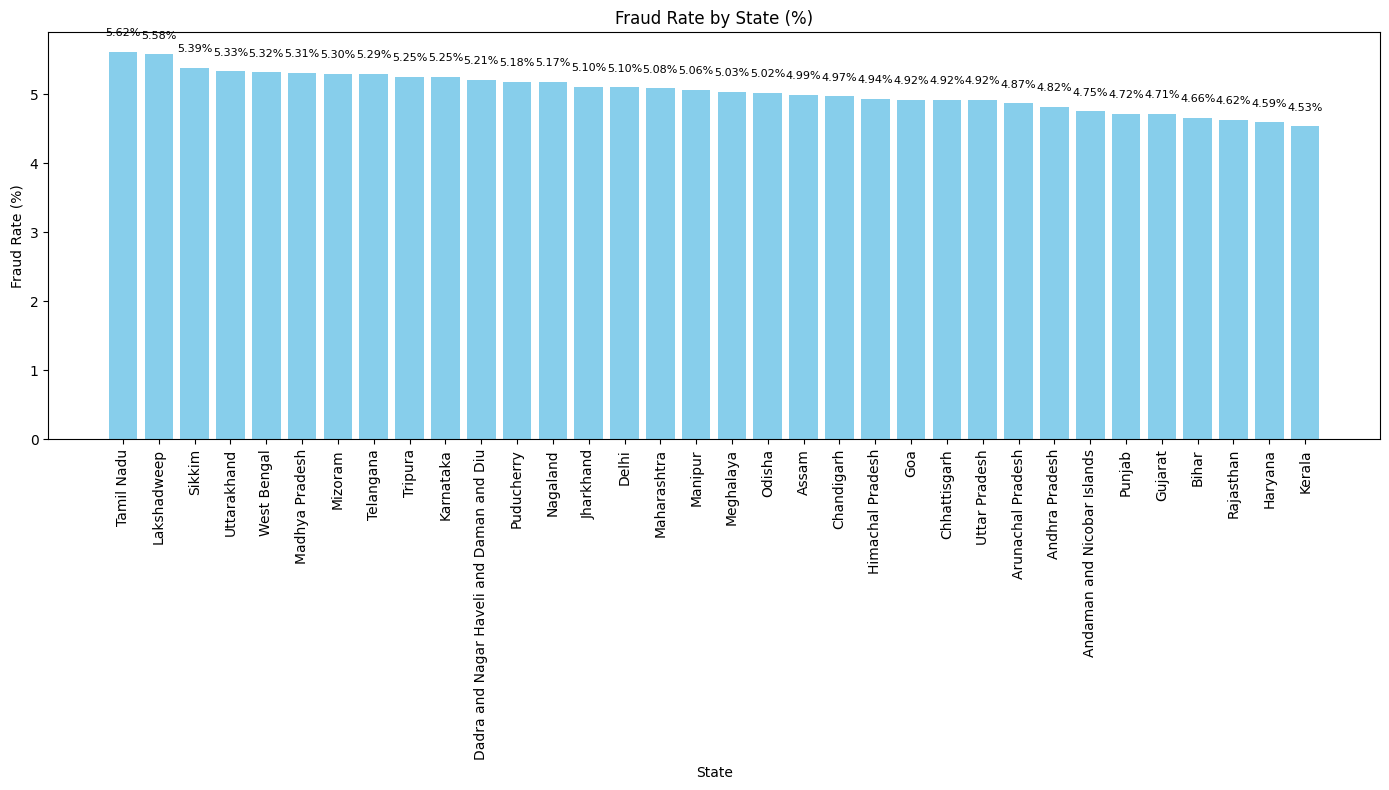

In [27]:
fraud_by_state = df[df['Is_Fraud'] == 1]['State'].value_counts()
total_by_state = df['State'].value_counts()
fraud_rate_by_state = (fraud_by_state / total_by_state * 100).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(fraud_rate_by_state.index, fraud_rate_by_state.values, color='skyblue')
plt.title('Fraud Rate by State (%)')
plt.xlabel('State')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=90)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Transaction Type, Merchant Category

<br>
Since both charts show balanced distributions, there’s no clear fraud hot spot by transaction type or merchant category. This supports the need for a broad-spectrum fraud prevention approach that doesn't rely solely on targeting specific transaction routes or merchant types.
<br> <br>

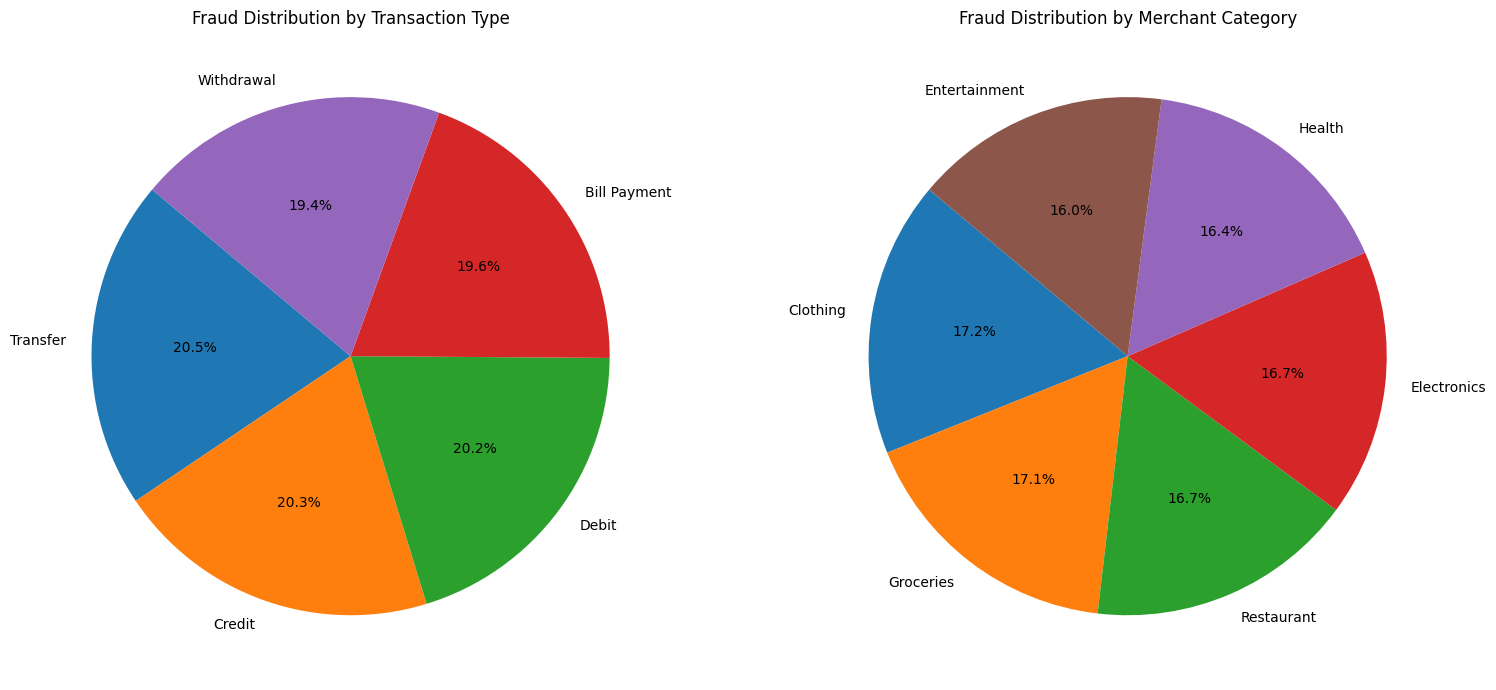

In [28]:
fraud_type = df[df['Is_Fraud'] == 1]['Transaction_Type'].value_counts(normalize=True) * 100
fraud_merchant = df[df['Is_Fraud'] == 1]['Merchant_Category'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].pie(fraud_type.values, labels=fraud_type.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Fraud Distribution by Transaction Type')

axes[1].pie(fraud_merchant.values, labels=fraud_merchant.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Fraud Distribution by Merchant Category')

plt.tight_layout()
plt.show()


## Account Balance vs Frauds

In [29]:
import seaborn as sns

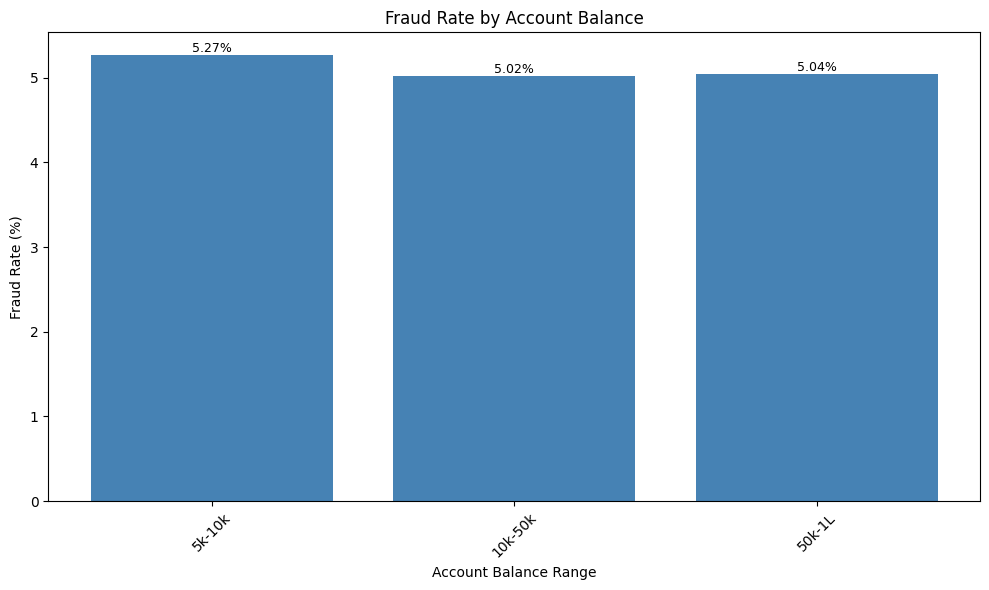

In [30]:
df['Balance_Bin'] = pd.cut(df['Account_Balance'], bins=[-1, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')],
                            labels=['<1k', '1k-5k', '5k-10k', '10k-50k', '50k-1L', '1L-5L', '5L-10L', '>10L'])
fraud_by_balance = df.groupby('Balance_Bin', observed=False)['Is_Fraud'].mean() * 100
fraud_by_balance_cleaned = fraud_by_balance.dropna()

# Plot again with valid bins only
plt.figure(figsize=(10, 6))
bars = plt.bar(fraud_by_balance_cleaned.index, fraud_by_balance_cleaned.values, color='steelblue')
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Account Balance Range")
plt.title("Fraud Rate by Account Balance")
plt.xticks(rotation=45)

# Add fraud rate labels
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Since business type accounts have seen a slightly higher rate of frauds, we suspect that might be linked to account balance. may be these accounts have more balance as compared to others which might attract frauds. to test this hypothesis, we will analyse the data both ways, visually as well as statistically using statistical tests.

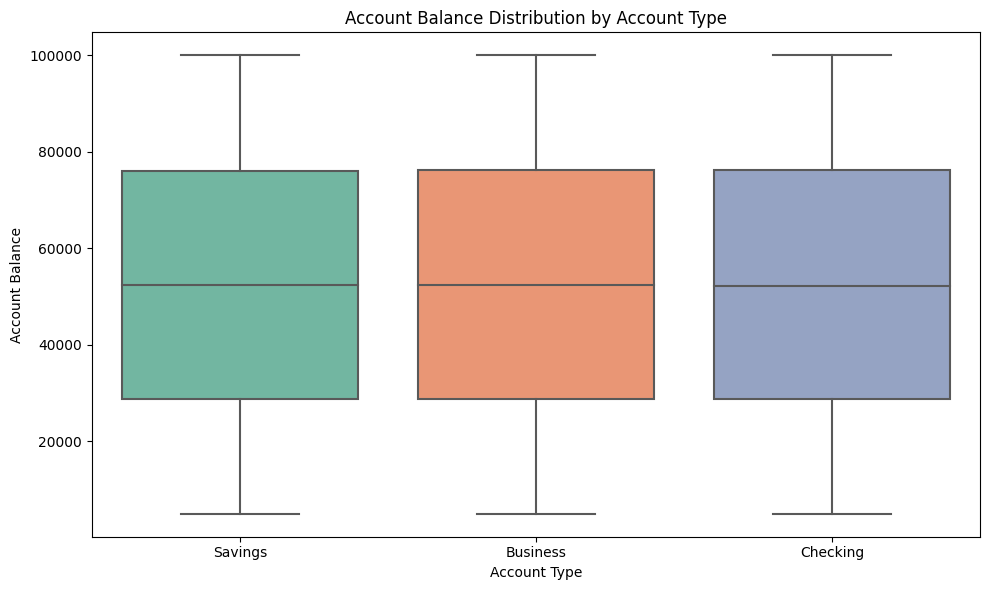

In [31]:
from scipy.stats import f_oneway, kruskal
from scipy.stats import shapiro, levene

# Visual analysis: boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Account_Type', y='Account_Balance', palette='Set2')
plt.title('Account Balance Distribution by Account Type')
plt.ylabel('Account Balance')
plt.xlabel('Account Type')
plt.tight_layout()
plt.show()


# Statistical Analysis

## 1. Relationship between Account Type and Balance

Seeing the box plot, we can assume that data is distributed normally. However, to be more sure, we would like to test the normality using shapiro wilk test. For this, we will collect the account balance data corresponding to each account type seperately. now we will test the normality of these three data using shapiro test.  <br>


### 1. Shapiro-Wilk Test <br>
H0: data is distributed normally <br>
H1: data is not distributed normally <br>
alpha: 0.05 (level of significance) <br>
p-values: <br>

'Shapiro_p_values': {'Business': 1.0938628424562155e-10, <br>
  'Savings': 1.114426604959993e-09, <br>
  'Checking': 1.9803242171165356e-11},<br>

all three p-values are less than 0.05, hence we reject the null hypothesis. <br>
Conclusion: Data is not distributed normally <br>


### 2. Levene's Test <br>
H0: variances of the three data are equal <br>
H1: unequal variance <br>
alpha: 0.05 <br>
p-value: 0.231 <br>
p-value > alpha; hence accept H0 <br>
Conclusion: variances are equal.  <br>


### 3. Anova Test <br>
H0: The mean account balances are the same across all account types i.e. mean_business = mean_savings = mean_checking <br>
H1: At least one account type has a different mean balance compared to the others. <br>
alpha: 0.05 <br>
p-value: 0.71 <br>
p-value > alpha; hence accept H0 <br>
Conclusion: no difference in mean account balances <br>


### 4. Kruskal-Wallis Test <br>
H0: The distribution of account balances is the same across all account types. (i.e. the medians come from the same population) <br>
H1: At least one account type has a different distribution or median balance than the others. <br>
alpha: 0.05 <br>
p-value: 0.71 <br>
p-value > alpha; hence accept H0. <br>
Conclusion: medians come from same population. 


- ANOVA compares means under normality.
- Kruskal-Wallis compares medians/ranks without assuming normality.

Since our data violated the normality assumption (Shapiro-Wilk), Kruskal-Wallis was the more appropriate test — and it confirmed that account type doesn't significantly impact account balance.


### Conclusion
Despite the slightly higher fraud rate in Business accounts, there is no statistically significant difference in account balances across account types. So, balance amount is not a likely factor driving higher fraud in business accounts. <br>

In [32]:
# Prepare data for statistical testing
business_bal = df[df['Account_Type'] == 'Business']['Account_Balance']
savings_bal = df[df['Account_Type'] == 'Savings']['Account_Balance']
checking_bal = df[df['Account_Type'] == 'Checking']['Account_Balance']

# Normality test (Shapiro-Wilk)
shapiro_business = shapiro(business_bal.sample(n=500, random_state=1))  # Sampled for stability
shapiro_savings = shapiro(savings_bal.sample(n=500, random_state=1))
shapiro_checking = shapiro(checking_bal.sample(n=500, random_state=1))

# Levene’s test for homogeneity of variance
levene_test = levene(business_bal, savings_bal, checking_bal)

# One-way ANOVA
anova_test = f_oneway(business_bal, savings_bal, checking_bal)

# Kruskal-Wallis (non-parametric)
kruskal_test = kruskal(business_bal, savings_bal, checking_bal)

{
    "Shapiro_p_values": {
        "Business": shapiro_business.pvalue,
        "Savings": shapiro_savings.pvalue,
        "Checking": shapiro_checking.pvalue
    },
    "Levene_p_value": levene_test.pvalue,
    "ANOVA_p_value": anova_test.pvalue,
    "Kruskal_p_value": kruskal_test.pvalue
}


{'Shapiro_p_values': {'Business': 1.0938628424562155e-10,
  'Savings': 1.114426604959993e-09,
  'Checking': 1.9803242171165356e-11},
 'Levene_p_value': 0.23054846961432693,
 'ANOVA_p_value': 0.7134835649173292,
 'Kruskal_p_value': 0.7127943856711872}

## 2. Do festivals affect fraud rates?

**t-test:** <br>
H0: mean(festival) = mean(non_festival) <br>
H1: mean(festival) != mean(non_festival) <br>
alpha: 0.05 <br>
p-value: 0.0932 <br>
p-value > alpha; hence accept H0 <br>
Conclusion: festivals don't affect the fraud transactions. <br>

**Mann-whitney u test:** <br>
H0: Distributions are identical <br>
H1: Distributions are not identical <br>
alpha: 0.05 <br>
p-value: 0.177 <br>
p-value > alpha; hence accept H0 <br>
Conclusion: Distributions are identical. <br>

**Final Conclusion:** <br>
While there is a trend indicating potential risk elevation during festive periods, more data or broader time windows may be needed to confirm this hypothesis with high confidence. Nonetheless, the results highlight the importance of event-aware fraud detection systems that are responsive to seasonal and behavioral transaction spikes.

In [33]:
from scipy.stats import ttest_ind, mannwhitneyu

fraud_by_date = df.groupby('Transaction_Date')['Is_Fraud'].agg(['sum', 'count'])
fraud_by_date.columns = ['Fraud_Count', 'Total_Transactions']
fraud_by_date['Fraud_Rate'] = fraud_by_date['Fraud_Count'] / fraud_by_date['Total_Transactions'] * 100

# Define festival and post-festival days based on observed spikes or cultural events
festival_days = ['2025-01-06', '2025-01-14', '2025-01-15', '2025-01-26', '2025-01-29']
non_festival_days = fraud_by_date.index.difference(festival_days)

# Prepare fraud rates for both groups
festival_rates = fraud_by_date.loc[festival_days]['Fraud_Rate']
non_festival_rates = fraud_by_date.loc[non_festival_days]['Fraud_Rate']

# Statistical tests
ttest_result = ttest_ind(festival_rates, non_festival_rates, equal_var=False)
mannwhitney_result = mannwhitneyu(festival_rates, non_festival_rates, alternative='two-sided')

{
    "Festival_Mean_Fraud_Rate": festival_rates.mean(),
    "NonFestival_Mean_Fraud_Rate": non_festival_rates.mean(),
    "TTest_p_value": ttest_result.pvalue,
    "MannWhitney_p_value": mannwhitney_result.pvalue
}


{'Festival_Mean_Fraud_Rate': 5.305846639487728,
 'NonFestival_Mean_Fraud_Rate': 4.881495755676378,
 'TTest_p_value': 0.09328071720777285,
 'MannWhitney_p_value': 0.17706390691650753}

## Peak Hours of Fraudulent Transactions 

H0: Fraudulent transactions are uniformly distributed across all 24 hours(i.e., no hour has significantly more frauds than others). <br>
H1: Fraudulent transactions are not uniformly distributed across hours(i.e., some hours experience significantly more or fewer frauds). <br>
alpha: 0.05 <br>
p-value: 0.891 <br>
p-value > alpha; hence accept H0. <br>
Conclusion: Fraudulent transactions are uniformly distributed across hours. <br>

**Final Conclusion:** <br>
The test results indicate that there is no statistically significant difference in fraud frequency across 24 hourly intervals. While visual trends may suggest slight peaks or dips, these variations are not strong enough to reject the hypothesis of uniform distribution. This suggests that fraud is fairly evenly spread across hours, supporting the earlier claim that fraud isn't restricted to "odd hours" or business hours. Therefore, fraud detection strategies should assume continuous risk across all hours, reinforcing the need for round-the-clock monitoring. <br> <br>

In [34]:
from scipy.stats import chisquare

# Extract fraud count per hour
df['Transaction_Hour'] = pd.to_datetime(df['Transaction_Time']).dt.hour
fraud_counts_by_hour = df[df['Is_Fraud'] == 1]['Transaction_Hour'].value_counts().sort_index()

# Expected if uniform: total frauds / 24 hours
expected_counts = [fraud_counts_by_hour.sum() / 24] * 24

# Chi-square goodness of fit test
chi2_stat, p_value = chisquare(f_obs=fraud_counts_by_hour.values, f_exp=expected_counts)

{
    "Chi2_Statistic": chi2_stat,
    "P_Value": p_value,
    "Conclusion": "Reject H0 (fraud is not evenly distributed across hours)" if p_value < 0.05 else "Fail to Reject H0 (no significant difference across hours)"
}


/tmp/ipykernel_35/2724344921.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



{'Chi2_Statistic': 15.091197462331483,
 'P_Value': 0.8913352097909564,
 'Conclusion': 'Fail to Reject H0 (no significant difference across hours)'}

In [35]:
df.to_csv('cleaned2.csv' ,index=False)

# Prepare Data for Modeling

In [36]:
df = pd.read_csv('cleaned2.csv')
df.head()

,Gender,Age,State,City,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,...,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Description_Category,Transaction_Hour,Transaction_Weekday,Age_Group,Balance_Bin
0,Male,60,Kerala,Thiruvananthapuram,Savings,2025-01-23,16:04:07,32415.45,Transfer,Restaurant,...,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,Bitcoin transaction,Finance,16,Thursday,61-70,50k-1L
1,Female,51,Maharashtra,Nashik,Business,2025-01-11,17:14:53,43622.60,Bill Payment,Restaurant,...,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,Grocery delivery,Personal,17,Saturday,51-60,50k-1L
2,Male,20,Bihar,Bhagalpur,Savings,2025-01-25,03:09:52,63062.56,Bill Payment,Groceries,...,ATM,"Bhagalpur, Bihar",Desktop,0,Mutual fund investment,Finance,3,Saturday,21-30,50k-1L
3,Female,57,Tamil Nadu,Chennai,Business,2025-01-19,12:27:02,14000.72,Debit,Entertainment,...,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,Food delivery,Personal,12,Sunday,51-60,50k-1L
4,Female,43,Punjab,Amritsar,Savings,2025-01-30,18:30:46,18335.16,Transfer,Entertainment,...,Virtual Card,"Amritsar, Punjab",Mobile,0,Debt repayment,Finance,18,Thursday,41-50,10k-50k


In [37]:
df.columns

Index(['Gender', 'Age', 'State', 'City', 'Account_Type', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Description', 'Description_Category', 'Transaction_Hour',
       'Transaction_Weekday', 'Age_Group', 'Balance_Bin'],
      dtype='object')

In [38]:
categorical_cols = ['Gender', 'State', 'Account_Type', 'Transaction_Type', 
                       'Merchant_Category', 'Transaction_Device', 'Description_Category']

for col in categorical_cols:
    print(col)
    print(df[col].unique())
    print()

Gender
['Male' 'Female']

State
['Kerala' 'Maharashtra' 'Bihar' 'Tamil Nadu' 'Punjab' 'Gujarat' 'Delhi'
 'Andaman and Nicobar Islands' 'Madhya Pradesh' 'Chhattisgarh' 'Mizoram'
 'West Bengal' 'Sikkim' 'Dadra and Nagar Haveli and Daman and Diu'
 'Uttar Pradesh' 'Odisha' 'Tripura' 'Assam' 'Manipur' 'Karnataka'
 'Andhra Pradesh' 'Goa' 'Haryana' 'Lakshadweep' 'Jharkhand' 'Meghalaya'
 'Chandigarh' 'Arunachal Pradesh' 'Nagaland' 'Telangana' 'Rajasthan'
 'Himachal Pradesh' 'Puducherry' 'Uttarakhand']

Account_Type
['Savings' 'Business' 'Checking']

Transaction_Type
['Transfer' 'Bill Payment' 'Debit' 'Withdrawal' 'Credit']

Merchant_Category
['Restaurant' 'Groceries' 'Entertainment' 'Health' 'Clothing'
 'Electronics']

Transaction_Device
['Voice Assistant' 'POS Mobile Device' 'ATM' 'POS Mobile App'
 'Virtual Card' 'Mobile Device' 'Payment Gateway Device'
 'Debit/Credit Card' 'Bank Branch' 'Desktop/Laptop'
 'Self-service Banking Machine' 'ATM Booth Kiosk' 'Biometric Scanner'
 'Web Browser' 'Tab

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

In [40]:
class ProcessDataPipeline(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mappings = {}
        self.ohe_columns = []
        self.holidays = pd.to_datetime([
            '2025-01-06', '2025-01-14', '2025-01-26', 
            '2025-01-29', '2025-01-04'
        ])

    def is_special_day(self, date):
        weekday = date.weekday()
        day = date.day
        
        if date in self.holidays or weekday == 6: # sunday
            return 1
        if weekday == 5 and (8 <= day <= 14 or 22 <= day <= 28):  # 2nd/4th saturday
            return 1
        return 0

    def fit(self, df, y=None):
        df = df.copy()
        # 1. Drop unnecessary columns
        df.drop(columns=['Transaction_Location', 'Transaction_Description', 'Age_Group', 'Balance_Bin'], inplace=True, errors='ignore')

        # 2. Binary Encoding for Gender
        df.loc[:, 'Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

        # 3. Frequency Encoding
        for col in ['State', 'City', 'Transaction_Device']:
            freq_map = df[col].value_counts().to_dict()
            df.loc[:, col] = df[col].map(freq_map)
            self.mappings[col] = freq_map

        # 4. Target Encoding
        target_cols = ['Transaction_Type', 'Device_Type', 'Merchant_Category']
        for col in target_cols:
            fraud_mean = df.groupby(col)['Is_Fraud'].mean().to_dict()
            df.loc[:, col] = df[col].map(fraud_mean)
            self.mappings[col] = fraud_mean

        # 5. One Hot Encoding
        df = pd.get_dummies(df, columns=['Account_Type', 'Description_Category'], drop_first=True)
        ohe_cols = [col for col in df.columns if col.startswith('Account_Type_') or col.startswith('Description_Category_')]
        df[ohe_cols] = df[ohe_cols].astype(int)
        self.ohe_columns = ohe_cols
        # df.drop(columns=['Account_Type', 'Description_Category'], inplace=True)


        # 6. Cyclic Encoding of Transaction Hour
        df.loc[:, 'Hour_sin'] = np.sin(2 * np.pi * df['Transaction_Hour']/24)
        df.loc[:, 'Hour_cos'] = np.sin(2 * np.pi * df['Transaction_Hour']/24)

        # 7. is_special_day feature
        df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
        df['Transaction_Weekday'] = df['Transaction_Date'].dt.weekday
        df['Is_Special_Day'] = df['Transaction_Date'].apply(self.is_special_day)

        # 8. Drop unwanted columns 
        df.drop(columns=['Transaction_Time', 'Transaction_Hour', 'Transaction_Date'], inplace=True)
        return df

    def transform(self, df):
        df = df.copy()
        # 1. drop unwanted columns
        df.drop(columns=['Transaction_Location', 'Transaction_Description', 'Age_Group', 'Balance_Bin'], inplace=True, errors='ignore')

        # 2. Map gender values
        df.loc[:, 'Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

        # 3. Map state, city, transaction device values with frequency encoded values saved earlier
        for col in ['State', 'City', 'Transaction_Device']:
            df.loc[:,col] = df[col].map(self.mappings.get(col, {})).fillna(0)

        # 4. Map target encoded values
        for col in ['Transaction_Type', 'Device_Type', 'Merchant_Category']:
            df.loc[:,col] = df[col].map(self.mappings.get(col, {})).fillna(0)

        # 5. One hot encoding
        # 5.1 Ensure required dummy columns exist
        for col in self.ohe_columns:
            df[col] = 0
        
        # 5.2 Set correct dummy value for Account_Type
        account_type_col = f"Account_Type_{df.loc[:, 'Account_Type'].values[0]}"
        if account_type_col in self.ohe_columns:
            df.loc[:, account_type_col] = 1
        
        # 5.3 Set correct dummy value for Description_Category
        desc_cat_col = f"Description_Category_{df.loc[:, 'Description_Category'].values[0]}"
        if desc_cat_col in self.ohe_columns:
            df.loc[:, desc_cat_col] = 1
        
        # 5.4 Drop original categorical columns
        df.drop(columns=['Account_Type', 'Description_Category'], inplace=True)

        # 6. Cyclic Encoding of Time Hour
        if 'Transaction_Hour' not in df.columns:
            df.loc[:, 'Transaction_Hour'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S', errors='coerce').dt.hour
            df.loc[:, 'Transaction_Hour'] = df['Transaction_Hour'].astype(int)
        df.loc[:,'Hour_sin'] = np.sin(2 * np.pi * df['Transaction_Hour']/24)
        df.loc[:,'Hour_sin'] = np.sin(2 * np.pi * df['Transaction_Hour']/24)


        # 7. is_special_day feature
        df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
        df['Transaction_Weekday'] = df['Transaction_Date'].dt.weekday
        df['Is_Special_Day'] = df['Transaction_Date'].apply(self.is_special_day)

        # 8. drop unwanted columns
        df.drop(columns=['Transaction_Time', 'Transaction_Hour', 'Transaction_Date'], inplace=True)
        return df

In [41]:
pipe = ProcessDataPipeline()
processed_df = pipe.fit(df.iloc[:-1, :])
processed_df.head()

,Gender,Age,State,City,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,...,Account_Type_Savings,Description_Category_Education,Description_Category_Finance,Description_Category_Health,Description_Category_Personal,Description_Category_Travel,Description_Category_Utilities,Hour_sin,Hour_cos,Is_Special_Day
0,1,60,5933,1140,32415.45,0.051886,0.05035,74557.27,8039,0.050548,...,1,0,1,0,0,0,0,-8.660254e-01,-8.660254e-01,0
1,0,51,5784,1125,43622.60,0.049276,0.05035,74622.66,8006,0.051011,...,0,0,0,0,1,0,0,-9.659258e-01,-9.659258e-01,1
2,1,20,5857,1139,63062.56,0.049276,0.051888,66817.99,21200,0.051011,...,1,0,1,0,0,0,0,7.071068e-01,7.071068e-01,1
3,0,57,5841,1161,14000.72,0.050763,0.048233,58177.08,7868,0.049899,...,0,0,0,0,1,0,0,1.224647e-16,1.224647e-16,1
4,0,43,5912,1172,18335.16,0.051886,0.048233,16108.56,8058,0.049899,...,1,0,1,0,0,0,0,-1.000000e+00,-1.000000e+00,0


In [42]:
df.iloc[[-1], :]

,Gender,Age,State,City,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Transaction_Type,Merchant_Category,...,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Description,Description_Category,Transaction_Hour,Transaction_Weekday,Age_Group,Balance_Bin
199999,Male,34,Nagaland,Kohima,Business,2025-01-08,15:26:19,58622.49,Debit,Electronics,...,Virtual Card,"Kohima, Nagaland",Mobile,0,Installment payment,Finance,15,Wednesday,31-40,10k-50k


In [43]:
test = pipe.transform(df.iloc[[-1], :])
test

,Gender,Age,State,City,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Device_Type,...,Account_Type_Checking,Account_Type_Savings,Description_Category_Education,Description_Category_Finance,Description_Category_Health,Description_Category_Personal,Description_Category_Travel,Description_Category_Utilities,Hour_sin,Is_Special_Day
199999,1,34,6030,1530,58622.49,0.050763,0.050317,15066.24,8058,0.049899,...,0,0,0,1,0,0,0,0,-0.707107,0


In [44]:
pipe.ohe_columns

['Account_Type_Checking',
 'Account_Type_Savings',
 'Description_Category_Education',
 'Description_Category_Finance',
 'Description_Category_Health',
 'Description_Category_Personal',
 'Description_Category_Travel',
 'Description_Category_Utilities']

In [45]:
len(processed_df.columns)

23

In [46]:
test['Is_Fraud']

199999    0
Name: Is_Fraud, dtype: int64

In [47]:
processed_df['Is_Fraud'].value_counts()

Is_Fraud
0    189911
1     10088
Name: count, dtype: int64

In [48]:
processed_df.to_csv('final.csv', index=False)